<a href="https://colab.research.google.com/github/Aswathys-28/CBTCIP/blob/main/Spam_Email_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




 **Email Spam Detection with Machine Learning**


---


*Data Science Project*

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Load the dataset
df = pd.read_csv('mail_data.csv')

# Display the first few rows of the dataset
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
rows, columns = df.shape
print(f"Number of rows are: {rows}")
print(f"Number of columns are: {columns}")

Number of rows are: 5572
Number of columns are: 2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 415


In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Category    0
Message     0
dtype: int64

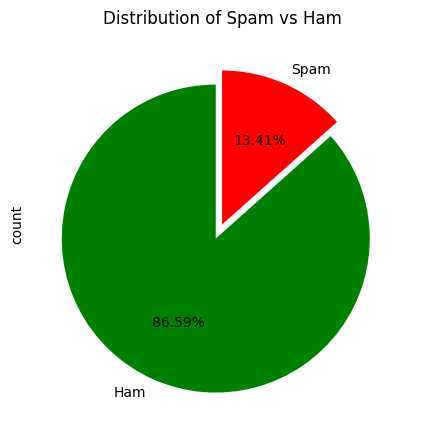

In [ ]:
# Calculate the distribution
spread = df['Category'].value_counts()

# Set up the figure
plt.figure(figsize=(5, 5))

# Plot the pie chart
spread.plot(kind='pie', autopct='%1.2f%%', labels=['Ham', 'Spam'], colors=['green', 'red'], startangle=90, explode=(0.1, 0))

# Add title
plt.title('Distribution of Spam vs Ham')

# Display the chart
plt.show()

In [ ]:
# Convert 'spam' and 'ham' to binary labels
df['Category'] = df['Category'].map({'spam': 0, 'ham': 1})

# Split the data into features (X) and target (Y)
X, Y = df["Message"], df["Category"]

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=3)

# Display the shapes of the split datasets
print(f"Training Set Size: {X_train.shape[0]}, Test Set Size: {X_test.shape[0]}")


Training Set Size: 3621, Test Set Size: 1951


In [ ]:
# TF-IDF feature extraction
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Convert target variables to integers
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)


In [ ]:
# Model training
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [ ]:
# Model evaluation
pred_on_training_data = model.predict(X_train_features)
acc_on_training_data = accuracy_score(Y_train, pred_on_training_data)

pred_on_test_data = model.predict(X_test_features)
acc_on_test_data = accuracy_score(Y_test, pred_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(acc_on_training_data * 100))
print('Accuracy on test data: {} %'.format(acc_on_test_data * 100))

Accuracy on training data: 96.3545981772991 %
Accuracy on test data: 95.89953869810354 %


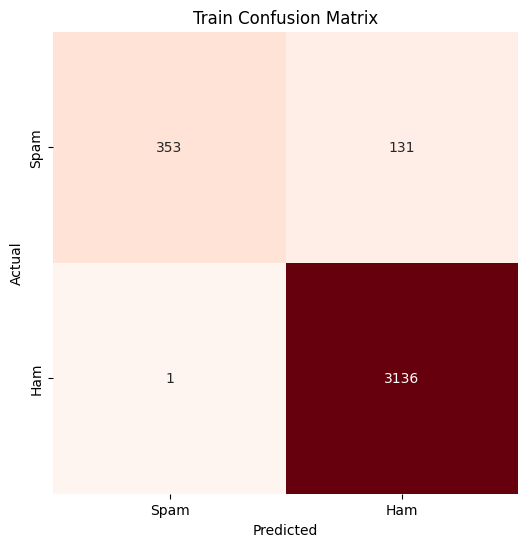

In [ ]:
# Confusion Matrix Visualization
confu_matrix = confusion_matrix(Y_train, pred_on_training_data)
plt.figure(figsize=(6, 6))
sns.heatmap(confu_matrix, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Train Confusion Matrix')
plt.show()

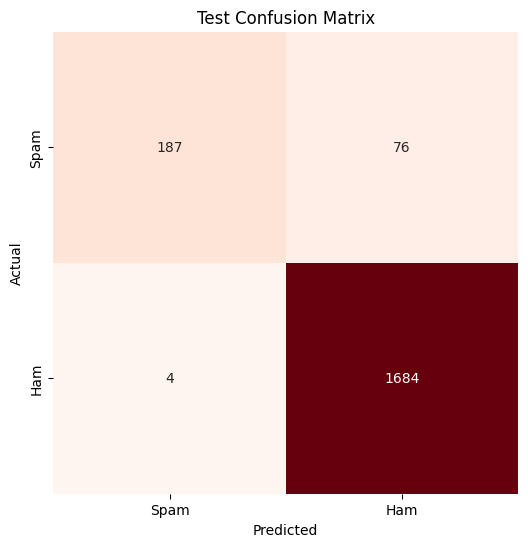

In [ ]:
# Confusion Matrix Visualization
confu_matrix = confusion_matrix(Y_test, pred_on_test_data)
plt.figure(figsize=(6, 6))
sns.heatmap(confu_matrix, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.show()

In [ ]:
# Classification report
classification_rep = classification_report(Y_test, prediction_on_test_data,target_names=['Spam', 'Ham'])
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

        Spam       0.98      0.71      0.82       263
         Ham       0.96      1.00      0.98      1688

    accuracy                           0.96      1951
   macro avg       0.97      0.85      0.90      1951
weighted avg       0.96      0.96      0.96      1951



In [ ]:
# Metrics calculation
TP = confu_matrix[1, 1]
TN = confu_matrix[0, 0]
FP = confu_matrix[0, 1]
FN = confu_matrix[1, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("Specificity : ",specificity)


Accuracy :  0.9589953869810354
Precision :  0.9568181818181818
Recall :  0.9976303317535545
Specificity :  0.7110266159695817


In [ ]:
# Make predictions on new input

input_mail ="You are a winner U have been specially selected 2 receive �1000 cash or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810810"
input_data_features = feature_extraction.transform([input_mail])
prediction = model.predict(input_data_features)
if prediction[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail


In [ ]:
# Make predictions on new input

input_mail ="As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"
input_data_features = feature_extraction.transform([input_mail])
prediction = model.predict(input_data_features)
if prediction[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Ham Mail
